<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/1.4-Multi_Qubit_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install imgaug==0.2.5
!pip install pylatexenc

References:


*   https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html




In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


## Controlled Pauli gates

### Controlled Pauli-X gate (or controlled NOT)
Flips the target qubit if the control qubit is |1>

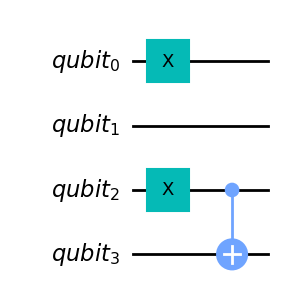

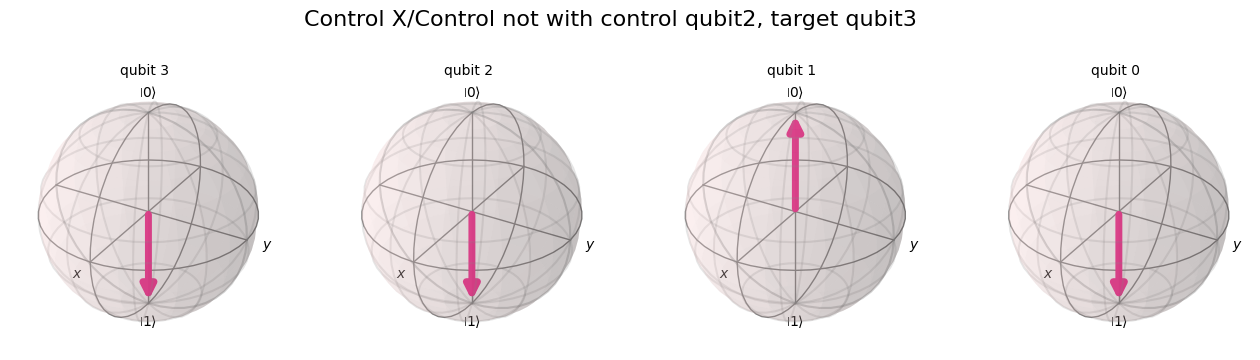

In [38]:
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(4, name="qubit")
qc = QuantumCircuit(qr)
qc.x([0, 2])
qc.cx(qr[2],qr[3])
sv = Statevector.from_instruction(qc)
display(qc.draw())
display(plot_bloch_multivector(qc, title="Control X/Control not with control qubit2, target qubit3", reverse_bits=True))

### Controlled Pauli-Y gate (or controlled phase and bit flip)
Applies iXZ to target qubit if control qubit is |1>


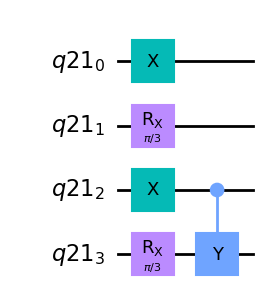

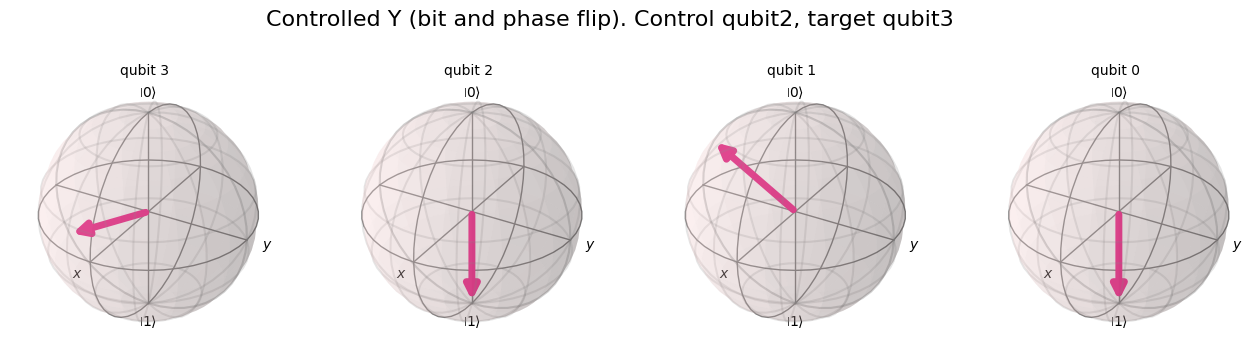

In [29]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.rx(np.pi/3, [1, 3])

qc.x([0, 2])
qc.cy(qr[2], qr[3])
sv = Statevector.from_instruction(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="Controlled Y (bit and phase flip). Control qubit2, target qubit3", reverse_bits=True)

### Controlled Pauli-Z gate (or controlled phase flip)
Flips the phase of target qubit if control qubit is |1>

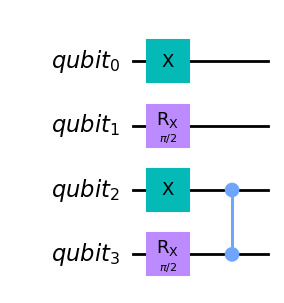

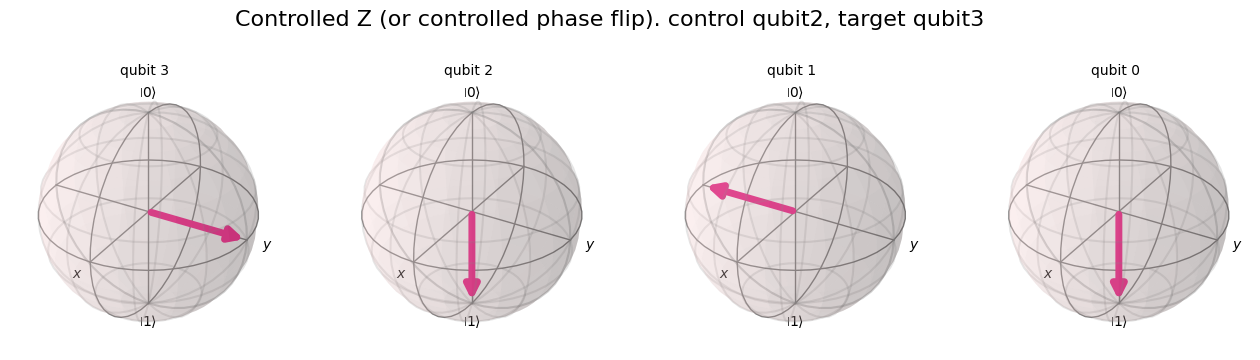

In [37]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4, name="qubit")
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.rx(np.pi/2, [1,3])

qc.cz(2, 3)


sv = Statevector.from_instruction(qc)
display(qc.draw())
plot_bloch_multivector(sv, title="Controlled Z (or controlled phase flip). control qubit2, target qubit3", reverse_bits=True)

## Controlled Hadamard gate
Applies a Hadamard gate in the target if the control bit is |1>

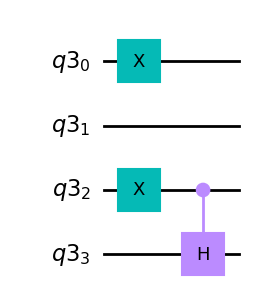

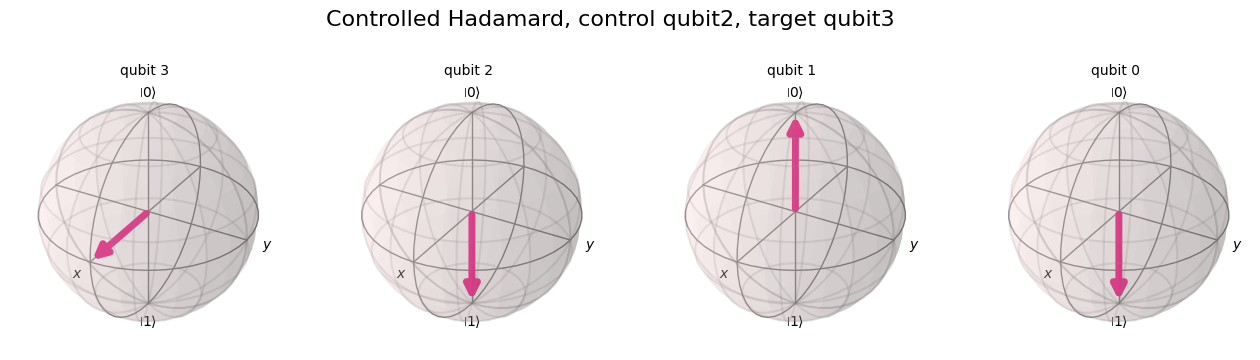

In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.ch(2,3)

display(qc.draw())
plot_bloch_multivector(qc, title="Controlled Hadamard, control qubit2, target qubit3",reverse_bits=True)

## Controled rotation gates: Controlled $R_x, R_y, R_z$

### Controlled $R_z(\theta)$
Rotates around the Z-axis of the target qubit by $\theta$ if the control bit is |1>

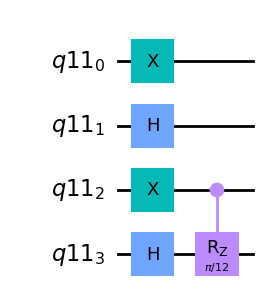

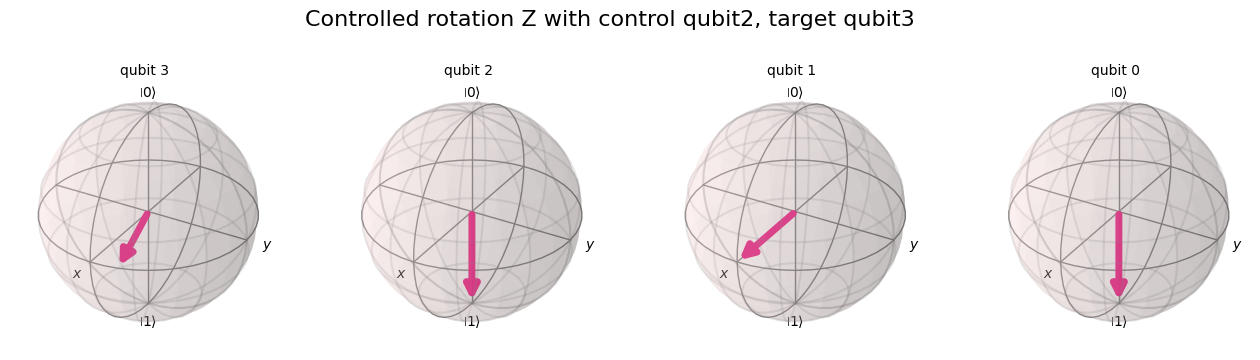

In [15]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.h([1,3])
qc.crz(np.pi/12, 2,3)

sv = Statevector(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="Controlled rotation Z with control qubit2, target qubit3", reverse_bits=True)

### Controlled phase rotation
Performs a phase rotation on the target qubit if the control qubit is in state |1>

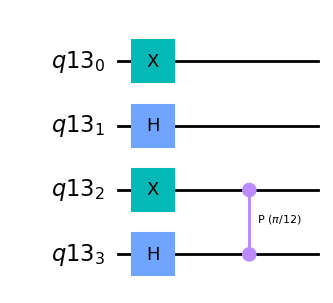

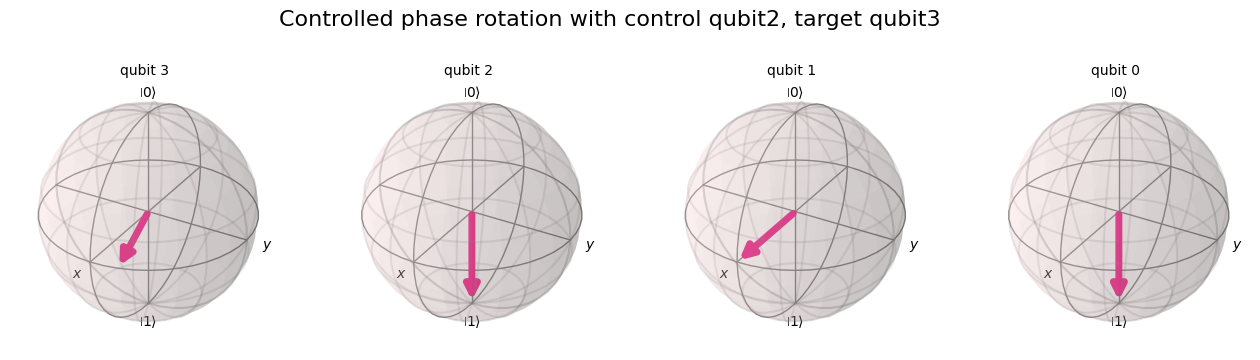

In [17]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.h([1,3])
qc.cp(np.pi/12, 2,3)

sv = Statevector(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="Controlled phase rotation with control qubit2, target qubit3", reverse_bits=True)

### Controlled U-rotation
Performs a U-rotation on the target qubit if the control qubit is in state |1>

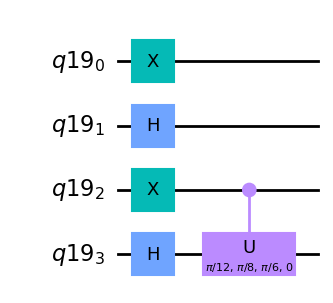

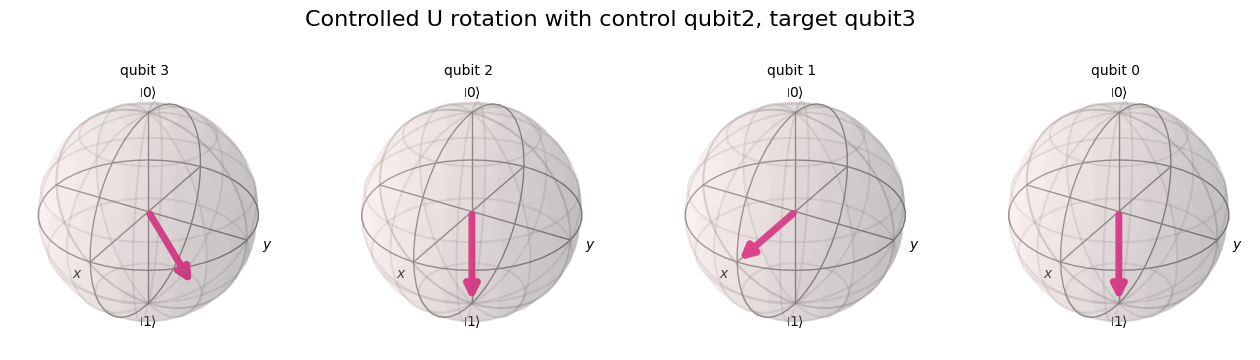

In [23]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.h([1,3])
qc.cu(np.pi/12, np.pi/8, np.pi/6, 0, 2,3)

sv = Statevector(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="Controlled U rotation with control qubit2, target qubit3", reverse_bits=True)

## SWAP gate
swaps the two qubits

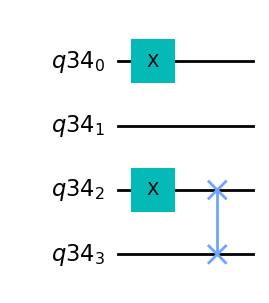

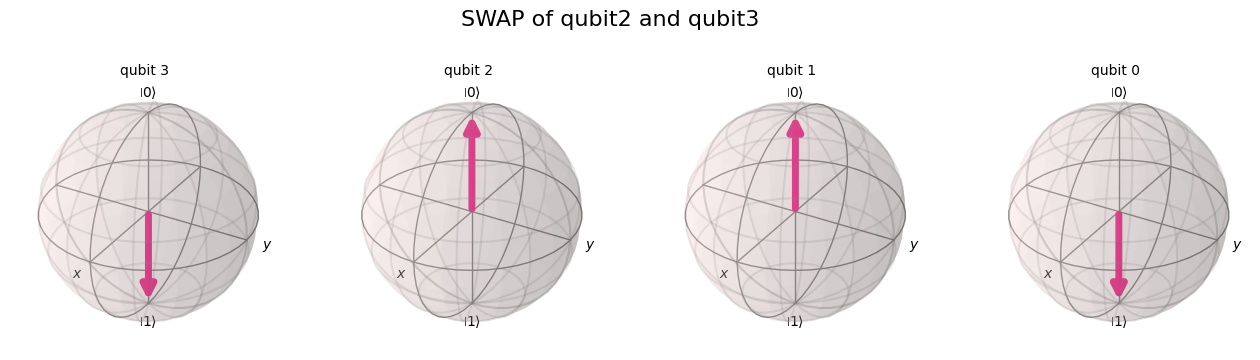

In [40]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

qc.x([0,2])
qc.swap(2,3)

sv = Statevector(qc)

display(qc.draw())
plot_bloch_multivector(sv, title="SWAP of qubit2 and qubit3", reverse_bits=True)

## 3-qubit gates

### Toffoli gate

### For checking unitary of the circuit

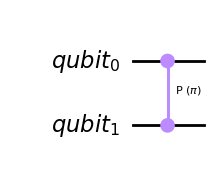

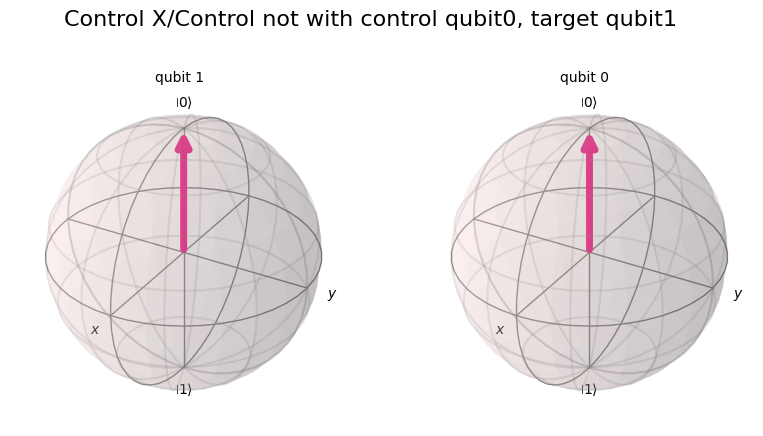

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [37]:
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qr = QuantumRegister(2, name="qubit")
qc = QuantumCircuit(qr)
qc.cp(np.pi, qr[0], qr[1])
sv = Statevector.from_instruction(qc)
display(qc.draw())
display(plot_bloch_multivector(qc, title="Control X/Control not with control qubit0, target qubit1", reverse_bits=True))

from qiskit import Aer, execute
be = Aer.get_backend("unitary_simulator")
job = execute(qc, backend=be, shots=1)
result = job.result()
print(result.get_unitary(qc, 2))